# **Ejercicios de pair programming Módulo 3 Sprint 1**
## **Regreción Lineal: Lección 8 - Encoding**
---

In [1]:
# Tratamiento de los datos 
# ========================
import pandas as pd
import numpy as np

# Librerías para la visualización de los datos
# ============================================
import seaborn as sns
import matplotlib.pyplot as plt

# Importación de variables y funciones
# ====================================
import sys
sys.path.append('../')
from src import soporte_variables as spv
from src import soporte_funciones as spf

# Configuración de warnings
# =========================
import warnings
warnings.filterwarnings('ignore')

# Establecer preferencias de visualización
# ========================================
pd.options.display.max_columns = None

En el pair programming de hoy usaremos el set de datos que guardastéis en el pair programming de normalización y estandarización.  

Vuestro set de datos debería tener al menos una variable categórica, el objetivo del pair programming de hoy:  

In [2]:
# cargamos el dataset
df = pd.read_csv("datos/soci_econ_country_profiles_estandarizado.csv", index_col = 0)
df.head(2)

region  restaurant_price_index  population_2017  \
country                                                            
Argentina  SouthAmerica                   50.37         0.432582   
Australia       Oceania                   77.12         0.095085   

           employment_agriculture  employment_industry  employment_services  \
country                                                                       
Argentina               -0.331263             0.131944             0.315638   
Australia               -0.273292            -0.368056             0.487805   

           education  quality_of_life_index  purchasing_power_index  \
country                                                               
Argentina   0.285714              -0.022740               -0.243315   
Australia   0.214286               0.550795                0.660990   

           safety_index  cost_of_living  consumer_price_index  \
country                                                         
Argentina     -1.258757        0.080347             -0.036551   
Australia     -0.139554        0.893666              0.102195   

           human_capital_index  inflation  urban_population  \
country                                                       
Argentina            -0.572700   0.383060          0.605509   
Australia             0.566766  -0.030665          0.393466   

           population_age_distribution_0_14  \
country                                       
Argentina                          0.927114   
Australia                          0.239067   

           population_age_distribution_60_plus  international_migrant_stock  \
country                                                                       
Argentina                            -0.437736                    -0.307692   
Australia                            -0.015094                     1.538462   

           restaurant_price_index_normal  
country                                   
Argentina                       4.246653  
Australia                       4.749998

- Hacer una códificación de la/las variables categóricas que tengáis en vuestro set de datos. Recordad que lo primero que deberéis hacer es decidir su vuestras variables tienen o no orden, para que en función de esto uséis una aproximación u otra.

Como en ANOVA hemos visto que la variable `region` afecta a la variable respuesta la consideramos ordinaria.

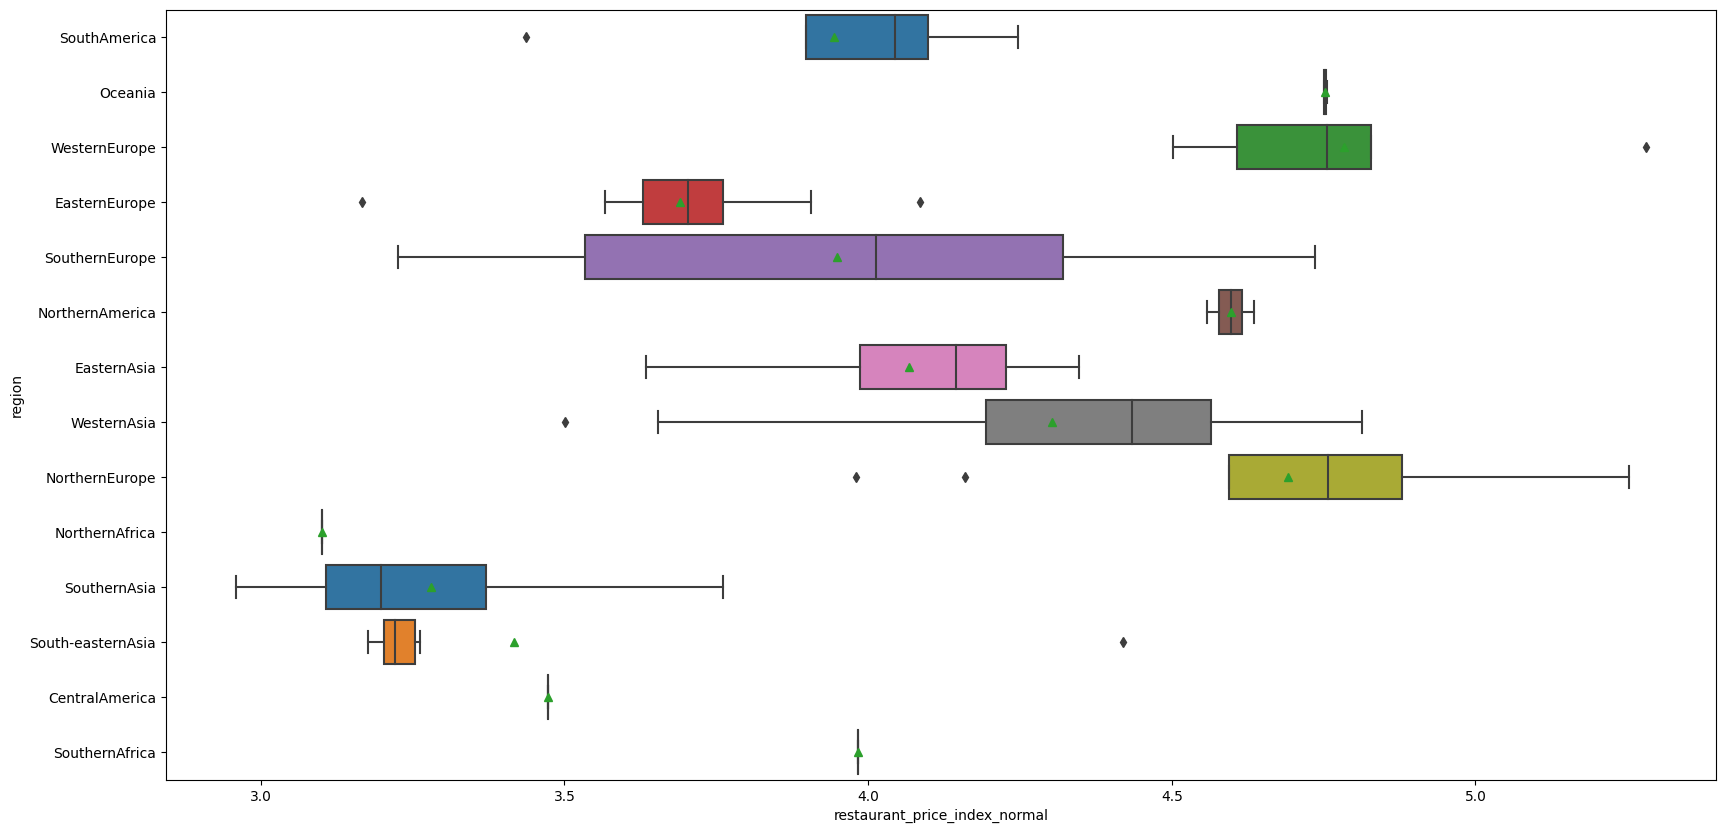

In [3]:
# influencia de la columna categórica sobre la variable respuesta
plt.figure(figsize=(20, 10))
sns.boxplot(y= 'region', x= 'restaurant_price_index_normal', data = df, palette = 'tab10', showmeans=True);

### 1. Enconding con ordinal encoder

In [4]:
# realizamos el encoding con la siguiente función en base al orden en el que se encuentra cada categoría (de menor a mayor media de la variable respuesta)
df_encoding = spf.ordinal_encoder(df, 'region', spv.orden_regiones, spv.paises_indice)
df_encoding.head()

region  restaurant_price_index  population_2017  \
country                                                             
Argentina   SouthAmerica                   50.37         0.432582   
Australia        Oceania                   77.12         0.095085   
Austria    WesternEurope                   66.94        -0.172512   
Belarus    EasternEurope                   37.60        -0.160047   
Belgium    WesternEurope                   82.34        -0.126655   

           employment_agriculture  employment_industry  employment_services  \
country                                                                       
Argentina               -0.331263             0.131944             0.315638   
Australia               -0.273292            -0.368056             0.487805   
Austria                 -0.107660             0.243056             0.120516   
Belarus                  0.298137             1.131944            -0.527977   
Belgium                 -0.397516            -0.368056             0.573888   

           education  quality_of_life_index  purchasing_power_index  \
country                                                               
Argentina   0.285714              -0.022740               -0.243315   
Australia   0.214286               0.550795                0.660990   
Austria     0.428571               0.765464                0.530557   
Belarus     0.000000              -0.338766               -0.699621   
Belgium     1.214286               0.302134                0.434187   

           safety_index  cost_of_living  consumer_price_index  \
country                                                         
Argentina     -1.258757        0.080347             -0.036551   
Australia     -0.139554        0.893666              0.102195   
Austria        1.143569        0.629026              0.018589   
Belarus        0.976879       -0.461962              1.186779   
Belgium       -0.255296        0.740210             -0.024568   

           human_capital_index  inflation  urban_population  \
country                                                       
Argentina            -0.572700   0.383060          0.605509   
Australia             0.566766  -0.030665          0.393466   
Austria               0.507418   0.030085         -0.615413   
Belarus              -0.081568   1.839723          0.111590   
Belgium               0.293769   0.050562          0.830865   

           population_age_distribution_0_14  \
country                                       
Argentina                          0.927114   
Australia                          0.239067   
Austria                           -0.332362   
Belarus                           -0.029155   
Belgium                            0.017493   

           population_age_distribution_60_plus  international_migrant_stock  \
country                                                                       
Argentina                            -0.437736                    -0.307692   
Australia                            -0.015094                     1.538462   
Austria                               0.294340                     0.694280   
Belarus                               0.007547                     0.213018   
Belgium                               0.256604                     0.284024   

           restaurant_price_index_normal  region_oe  
country                                              
Argentina                       4.246653          7  
Australia                       4.749998         11  
Austria                         4.581754         12  
Belarus                         3.906126          4  
Belgium                         4.828160         12

In [5]:
# vemos los valores que ha generado
df_encoding.region_oe.unique()

array([ 7, 11, 12,  4,  6, 10,  8,  9, 13,  0,  1,  2,  3,  5])

### 2. Enconding con map

Como vemos en el boxplot las diferencias entre las medianas de las categorías son muy variables, por lo que no son coherentes con un salto de 1 ud numérica de cada categoría a la siguiente. Por eso nos parece que un map usando los valores de las medianas de cada categoría es la aproximación más adecuada. 

In [6]:
# obtenemos las medianas de la variable respuesta por categorías
medianas = df.groupby('region')['restaurant_price_index_normal'].median().reset_index().sort_values(by='restaurant_price_index_normal')
medianas

region  restaurant_price_index_normal
3      NorthernAfrica                       3.100294
10       SouthernAsia                       3.198339
7   South-easternAsia                       3.221388
0      CentralAmerica                       3.473377
2       EasternEurope                       3.703008
9      SouthernAfrica                       3.983642
11     SouthernEurope                       4.013308
8        SouthAmerica                       4.043640
1         EasternAsia                       4.145547
12        WesternAsia                       4.435114
4     NorthernAmerica                       4.596907
6             Oceania                       4.752619
13      WesternEurope                       4.754992
5      NorthernEurope                       4.756654

In [7]:
# creamos el mapa para el encoding con los valores de las medianas de la variable respuesta 
mapa = {'NorthernAfrica': medianas.iloc[0,1], 'SouthernAsia': medianas.iloc[1,1], 'South-easternAsia': medianas.iloc[2,1], 'CentralAmerica': medianas.iloc[3,1], 'EasternEurope': medianas.iloc[4,1],
        'SouthernAfrica': medianas.iloc[5,1], 'SouthernEurope': medianas.iloc[6,1], 'SouthAmerica': medianas.iloc[7,1], 'EasternAsia': medianas.iloc[8,1], 'WesternAsia': medianas.iloc[9,1], 
        'NorthernAmerica': medianas.iloc[10,1], 'Oceania': medianas.iloc[11,1], 'WesternEurope': medianas.iloc[12,1], 'NorthernEurope': medianas.iloc[13,1]}

In [8]:
# aplicamos el mapa
df["region_map"] = df["region"].map(mapa)
df.head()

region  restaurant_price_index  population_2017  \
country                                                             
Argentina   SouthAmerica                   50.37         0.432582   
Australia        Oceania                   77.12         0.095085   
Austria    WesternEurope                   66.94        -0.172512   
Belarus    EasternEurope                   37.60        -0.160047   
Belgium    WesternEurope                   82.34        -0.126655   

           employment_agriculture  employment_industry  employment_services  \
country                                                                       
Argentina               -0.331263             0.131944             0.315638   
Australia               -0.273292            -0.368056             0.487805   
Austria                 -0.107660             0.243056             0.120516   
Belarus                  0.298137             1.131944            -0.527977   
Belgium                 -0.397516            -0.368056             0.573888   

           education  quality_of_life_index  purchasing_power_index  \
country                                                               
Argentina   0.285714              -0.022740               -0.243315   
Australia   0.214286               0.550795                0.660990   
Austria     0.428571               0.765464                0.530557   
Belarus     0.000000              -0.338766               -0.699621   
Belgium     1.214286               0.302134                0.434187   

           safety_index  cost_of_living  consumer_price_index  \
country                                                         
Argentina     -1.258757        0.080347             -0.036551   
Australia     -0.139554        0.893666              0.102195   
Austria        1.143569        0.629026              0.018589   
Belarus        0.976879       -0.461962              1.186779   
Belgium       -0.255296        0.740210             -0.024568   

           human_capital_index  inflation  urban_population  \
country                                                       
Argentina            -0.572700   0.383060          0.605509   
Australia             0.566766  -0.030665          0.393466   
Austria               0.507418   0.030085         -0.615413   
Belarus              -0.081568   1.839723          0.111590   
Belgium               0.293769   0.050562          0.830865   

           population_age_distribution_0_14  \
country                                       
Argentina                          0.927114   
Australia                          0.239067   
Austria                           -0.332362   
Belarus                           -0.029155   
Belgium                            0.017493   

           population_age_distribution_60_plus  international_migrant_stock  \
country                                                                       
Argentina                            -0.437736                    -0.307692   
Australia                            -0.015094                     1.538462   
Austria                               0.294340                     0.694280   
Belarus                               0.007547                     0.213018   
Belgium                               0.256604                     0.284024   

           restaurant_price_index_normal  region_oe  region_map  
country                                                          
Argentina                       4.246653          7    4.043640  
Australia                       4.749998         11    4.752619  
Austria                         4.581754         12    4.754992  
Belarus                         3.906126          4    3.703008  
Belgium                         4.828160         12    4.754992

In [9]:
# eliminamos la columna que no vamos a usar:
df.drop(columns='region_oe', inplace=True)
df.sample()

region  restaurant_price_index  \
country                                                                    
Venezuela (Bolivarian Republic of)  SouthAmerica                   37.34   

                                    population_2017  employment_agriculture  \
country                                                                       
Venezuela (Bolivarian Republic of)         0.223238                0.488613   

                                    employment_industry  employment_services  \
country                                                                        
Venezuela (Bolivarian Republic of)             0.409722            -0.361549   

                                    education  quality_of_life_index  \
country                                                                
Venezuela (Bolivarian Republic of)  -0.940013              -2.189445   

                                    purchasing_power_index  safety_index  \
country                                                                    
Venezuela (Bolivarian Republic of)               -1.386676     -2.513083   

                                    cost_of_living  consumer_price_index  \
country                                                                    
Venezuela (Bolivarian Republic of)       -0.332827              3.155363   

                                    human_capital_index  inflation  \
country                                                              
Venezuela (Bolivarian Republic of)            -1.092696    2.60489   

                                    urban_population  \
country                                                
Venezuela (Bolivarian Republic of)          0.476143   

                                    population_age_distribution_0_14  \
country                                                                
Venezuela (Bolivarian Republic of)                          1.241983   

                                    population_age_distribution_60_plus  \
country                                                                   
Venezuela (Bolivarian Republic of)                             -0.85283   

                                    international_migrant_stock  \
country                                                           
Venezuela (Bolivarian Republic of)                    -0.331361   

                                    restaurant_price_index_normal  region_map  
country                                                                        
Venezuela (Bolivarian Republic of)                       3.898093     4.04364

- Guardad el dataframe, donde deberíais tener las variables estadandarizas, normalizadas y codificadas en un csv para usarlo en el próximo pairprogramming

In [10]:
df.to_csv("datos/soci_econ_country_profiles_encoding.csv")